In [ ]:
# Importing Libraries
import pandas as pd
import sys 
from pathlib import Path 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
sys.path.append(str(Path.cwd().parents[0]))
from data.raw.downloaded_data import load_raw_data
from src.cleaning import drop_unwanted_columns
from src.features import adding_all_features

df = load_raw_data()
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Exploring data shape and features
df.shape

(101766, 50)

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
# Dropping columns
df.columns
df = drop_unwanted_columns(df)

In [ ]:
# Displaying data imbalance
display(df['readmitted'].value_counts(normalize=True))

print("Only 11% encounter result in 30-day readmission, showing sever class imbalance.")

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

Only 11% encounter result in 30-day readmission, showing sever class imbalance.


In [ ]:
# Checking for any duplications
df.loc[df.duplicated()]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [ ]:
# Observing the amount of null values 
df.isna().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [12]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
# Diagnosis 1,2, and 3 all have some missing values so will replace with NaN's 
display(df[df['diag_1']=='?'].shape[0])
display(df[df['diag_2']=='?'].shape[0])
display(df[df['diag_3']=='?'].shape[0])

21

358

1423

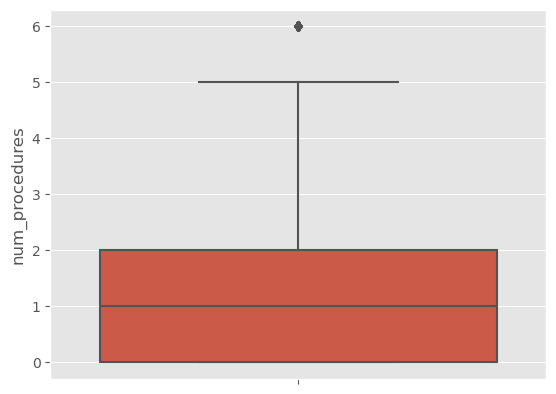

In [ ]:
# Visualizing some of the cat and numerical variables
sns.boxplot(data=df, y='num_procedures')
plt.show()

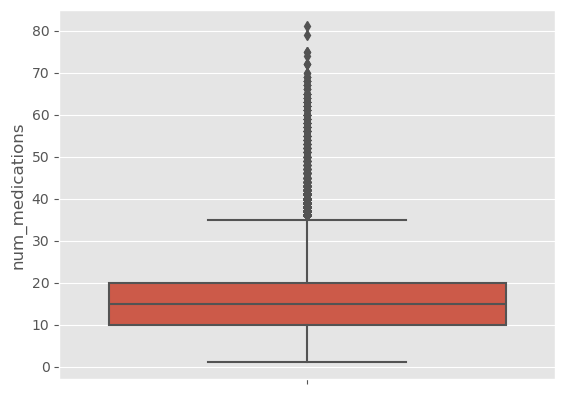

In [15]:
sns.boxplot(data=df, y='num_medications')
plt.show()

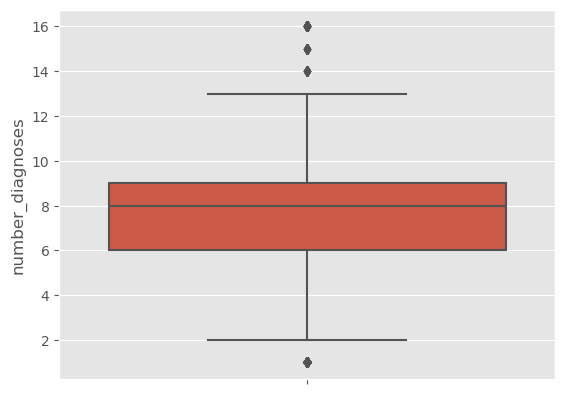

In [16]:
sns.boxplot(data=df, y='number_diagnoses')
plt.show()

In [17]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

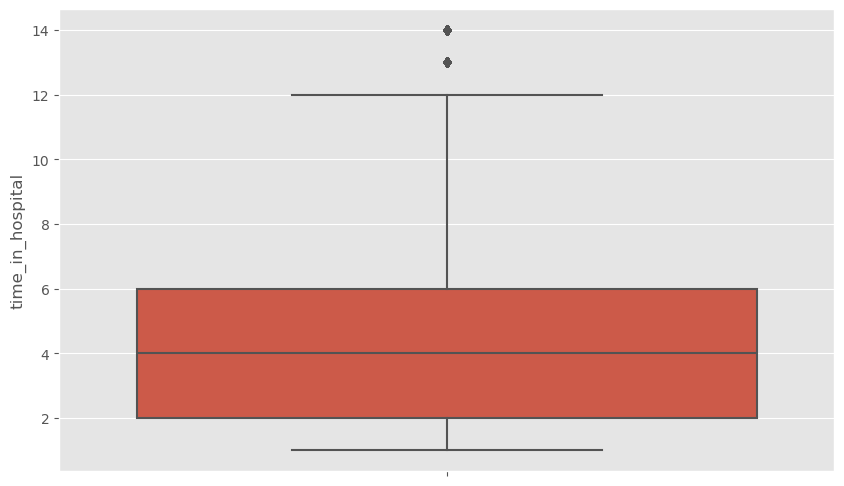

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='time_in_hospital')
plt.show()

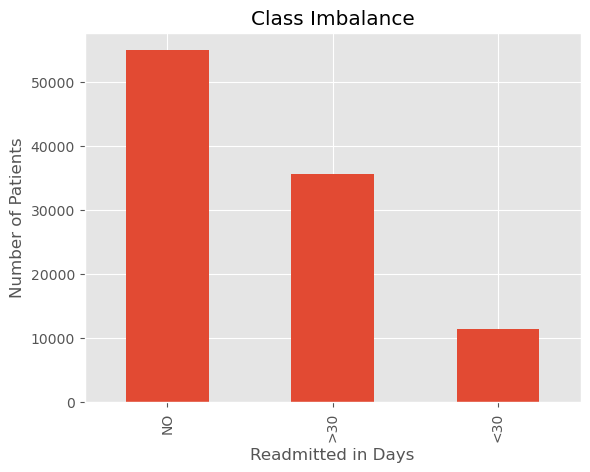

In [ ]:
# Visualizing the class imbalance
ax = df['readmitted'].value_counts() \
    .plot(kind='bar')
    
ax.set_xlabel('Readmitted in Days')
ax.set_ylabel('Number of Patients')
ax.set_title('Class Imbalance')
plt.show()

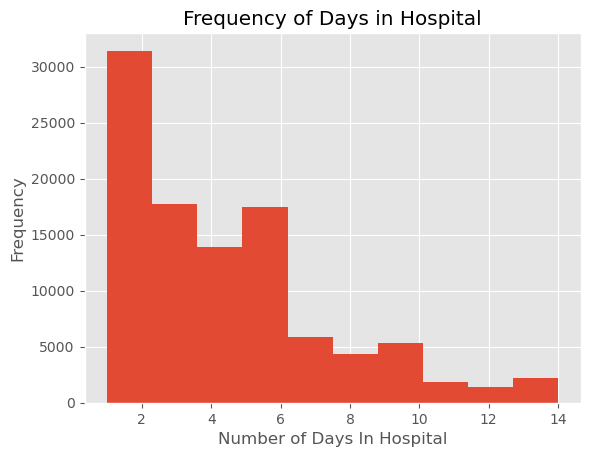

In [20]:
ax = df['time_in_hospital']\
    .plot(kind='hist')
ax.set_xlabel('Number of Days In Hospital')
ax.set_title('Frequency of Days in Hospital')
plt.show()

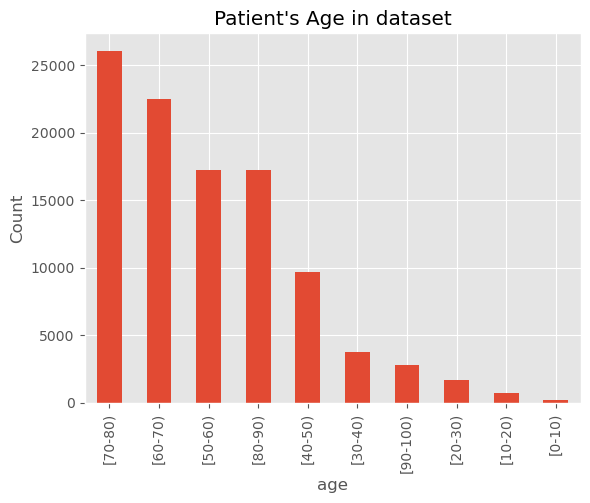

In [21]:
ax = df['age'].value_counts()\
    .plot(kind='bar')
ax.set_ylabel('Count')
ax.set_title("Patient's Age in dataset")
plt.show()

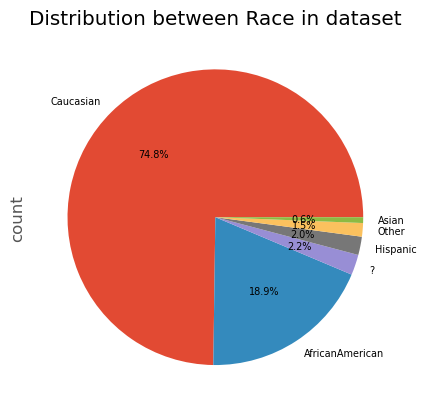

In [22]:
ax = df['race'].value_counts()\
    .plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 7})
    
ax.set_title('Distribution between Race in dataset')
plt.show()

<function matplotlib.pyplot.subplot(*args, **kwargs) -> 'Axes'>

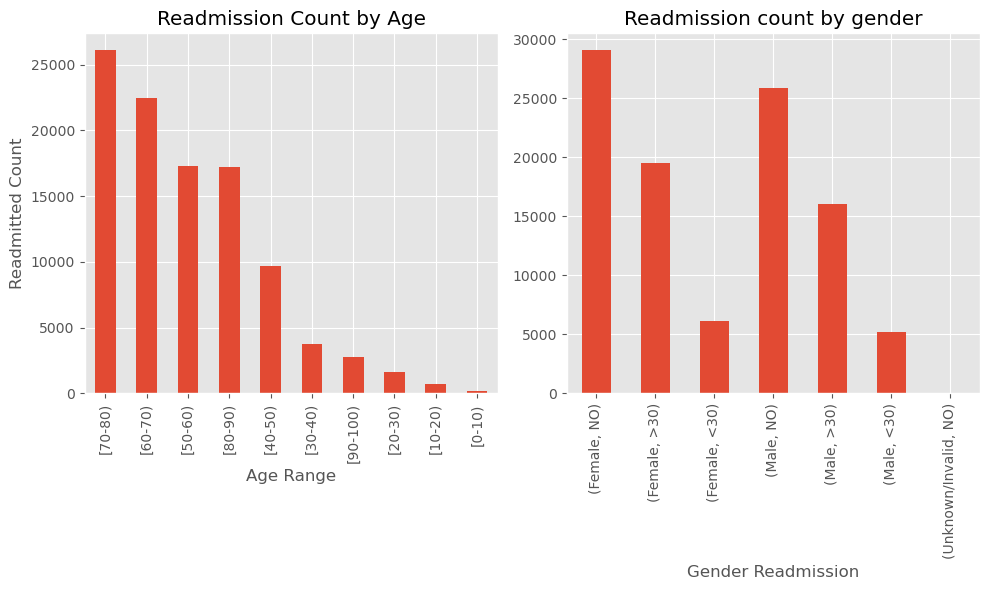

In [49]:
age_info = df.groupby('age')['readmitted'].count().sort_values(ascending=False)
gender_info=df.groupby('gender')['readmitted'].value_counts()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
age_info.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Readmitted Count')
plt.title('Readmission Count by Age')


plt.subplot(1,2,2)
gender_info.plot(kind='bar')
plt.title('Readmission count by gender')
plt.xlabel('Gender Readmission')
plt.tight_layout()

plt.subplot

Text(0.5, 1.05, 'Numerical Features Exploration Per Readmitted')

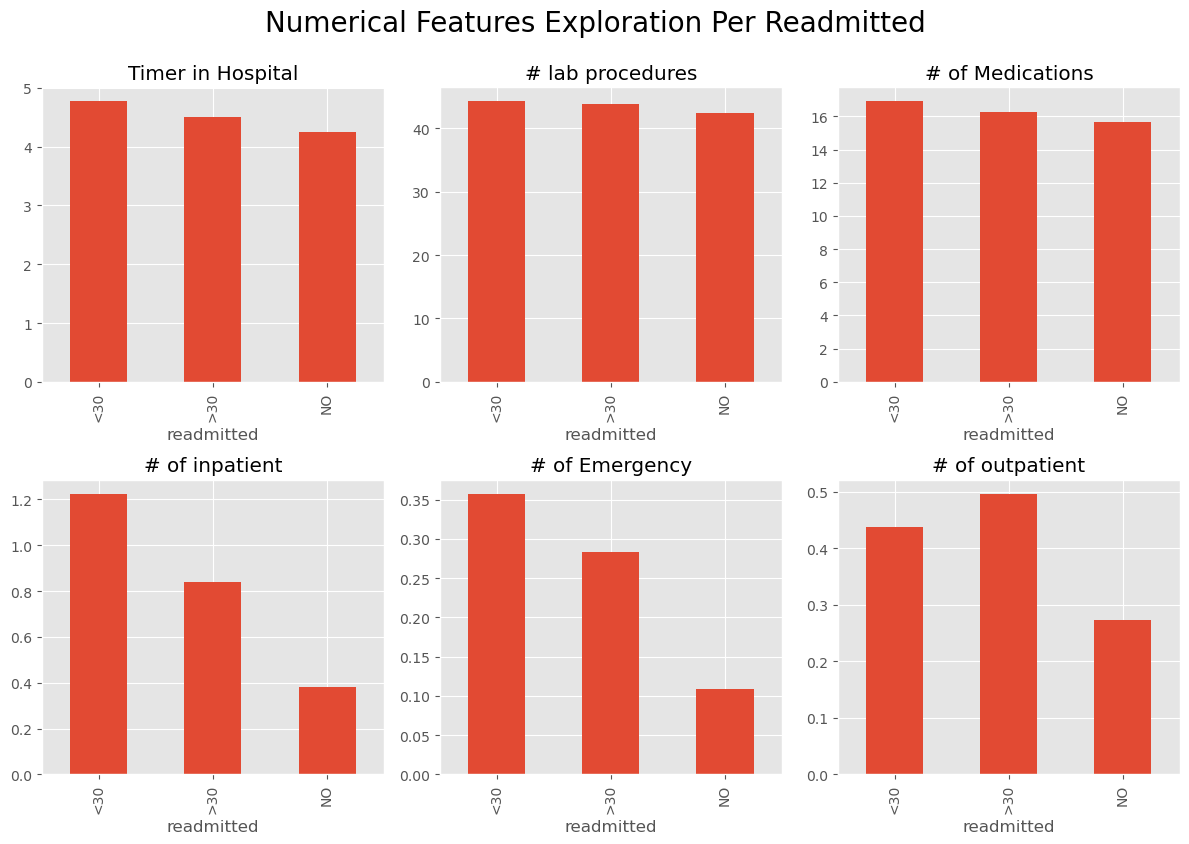

In [24]:
time_in_hrs = df.groupby('readmitted')['time_in_hospital'].mean()
num_law_pr = df.groupby('readmitted')['num_lab_procedures'].mean()
num_med = df.groupby('readmitted')['num_medications'].mean()
num_inpa = df.groupby('readmitted')['number_inpatient'].mean()
num_emergency = df.groupby('readmitted')['number_emergency'].mean()
num_outpa = df.groupby('readmitted')['number_outpatient'].mean()

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
time_in_hrs.plot(kind='bar')
plt.title('Timer in Hospital')
plt.tight_layout()

plt.subplot(2,3,2)
num_law_pr.plot(kind='bar')
plt.title('# lab procedures')
plt.tight_layout()

plt.subplot(2,3,3)
num_med.plot(kind='bar')
plt.title('# of Medications')
plt.tight_layout()

plt.subplot(2,3,4)
num_inpa.plot(kind='bar')
plt.title('# of inpatient')
plt.tight_layout()

plt.subplot(2,3,5)
num_emergency.plot(kind='bar')
plt.title('# of Emergency')
plt.tight_layout()

plt.subplot(2,3,6)
num_outpa.plot(kind='bar')
plt.title('# of outpatient')
plt.tight_layout()
plt.suptitle('Numerical Features Exploration Per Readmitted', y =1.05, fontsize=20)


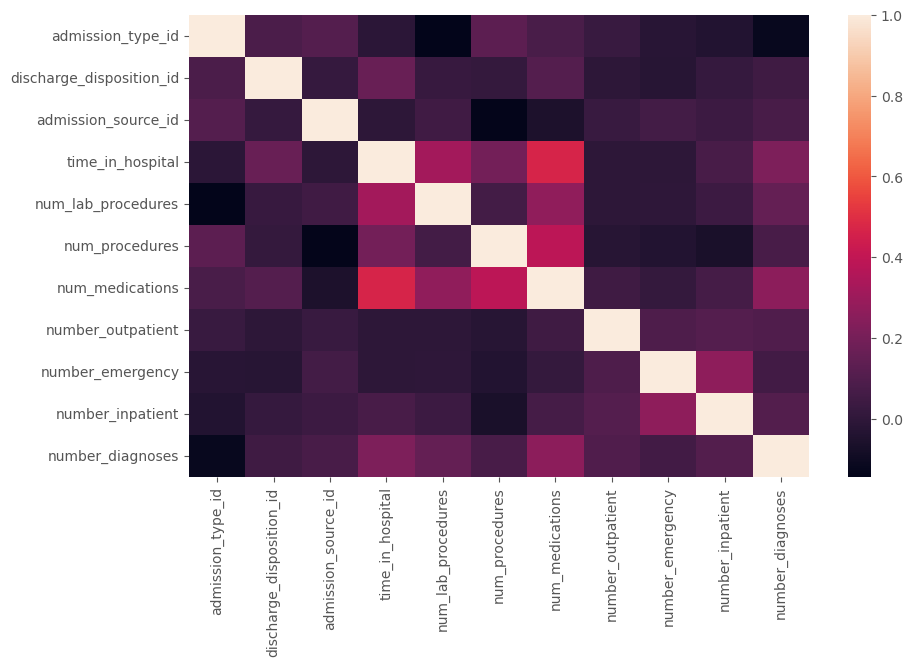

In [25]:
med_corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(med_corr)
plt.show()

Can we accurately identify hospitalized patients at high risk of being readmitted within 30 days using only information available at discharge?

In [26]:
df = adding_all_features(df)

In [30]:
df[['total_visits', 'num_medication_change', 'insulin_used','has_diabetes_complications', 'num_procedures','number_diagnoses']].describe()

,total_visits,num_medication_change,insulin_used,has_diabetes_complications,num_procedures,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.202759,0.287444,0.534393,0.099218,1.339730,7.422607
std,2.291781,0.487526,0.498818,0.298956,1.705807,1.933600
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000
75%,2.000000,1.000000,1.000000,0.000000,2.000000,9.000000
max,80.000000,4.000000,1.000000,1.000000,6.000000,16.000000


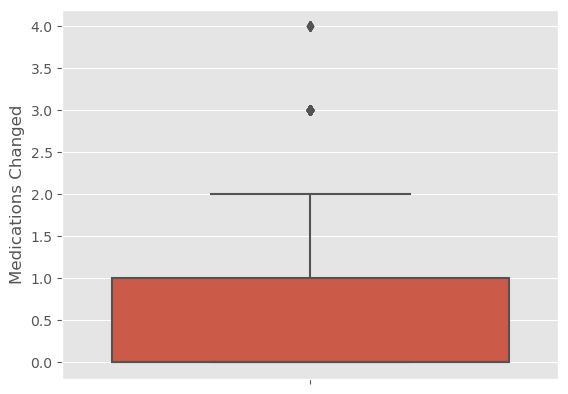

In [35]:
sns.boxplot(data = df, y='num_medication_change')
plt.ylabel('Medications Changed')
plt.show()

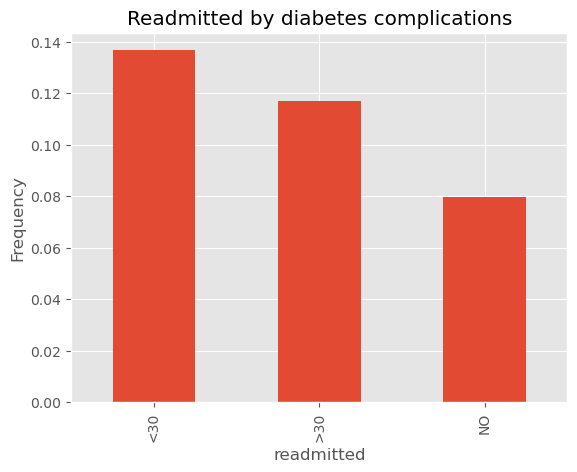

In [44]:
df.groupby('readmitted')['has_diabetes_complications']\
    .mean()\
        .plot(kind='bar')
        
plt.ylabel('Frequency')
plt.title('Readmitted by diabetes complications')
plt.show()



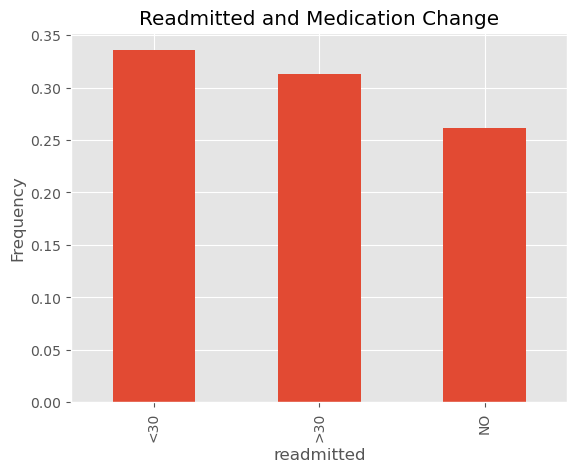

In [48]:
df.groupby('readmitted')['num_medication_change']\
    .mean()\
        .plot(kind='bar')
        
plt.ylabel('Frequency')
plt.title('Readmitted and Medication Change')
plt.show()